In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/Time Series/BOE-XUDLERD.csv")
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608
...,...
1975-01-08,0.7554
1975-01-07,0.7510
1975-01-06,0.7524


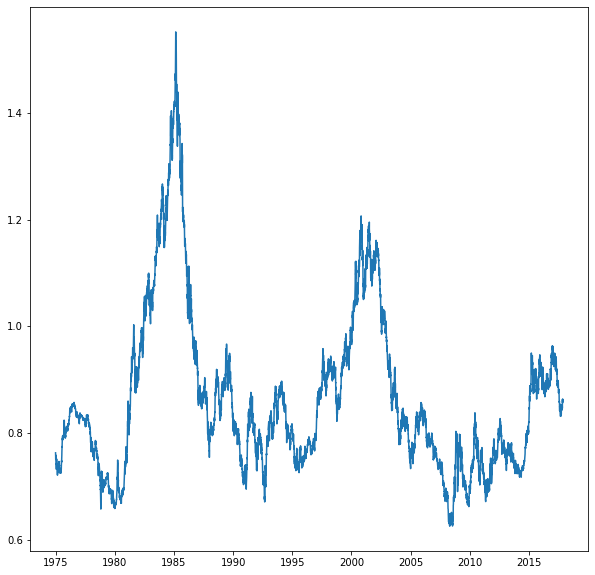

In [10]:
plt.figure(figsize=(10,10))
plt.plot(df['Value'])

Date
1975-01-31    0.749132
1975-02-28    0.737910
1975-03-31    0.730337
1975-04-30    0.741623
1975-05-31    0.731286
                ...   
2017-07-31    0.868205
2017-08-31    0.847109
2017-09-30    0.839519
2017-10-31    0.850691
2017-11-30    0.861243
Freq: M, Name: Value, Length: 515, dtype: float64

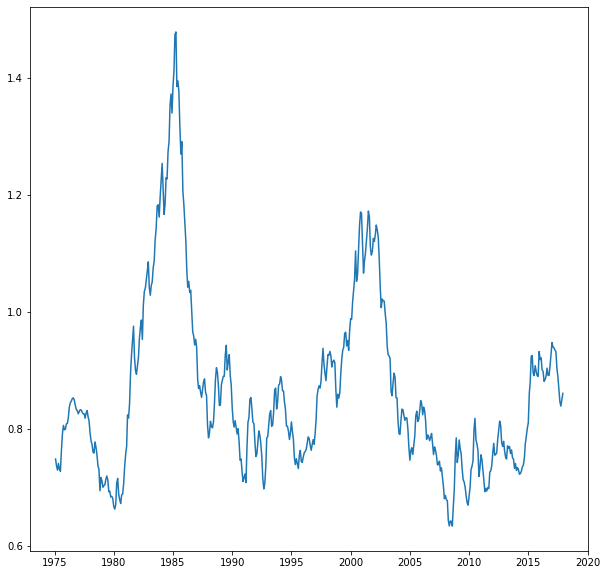

In [49]:
ts_month=df['Value'].resample('M').mean()
plt.figure(figsize=(10,10))
plt.plot(ts_month)

In [12]:
from statsmodels.tsa.stattools import adfuller
results=adfuller(ts_month)
print("The adfullee test result is:%f" % results[1])
#p>0.05 timeseries is nonStationary
results

The adfullee test result is:0.151742


(-2.3653981425133788,
 0.15174157595016152,
 3,
 511,
 {'1%': -3.4432119442564324,
  '5%': -2.8672126791646955,
  '10%': -2.569791324979607},
 -2400.7262821586696)

In [17]:
diff=ts_month-ts_month.shift()
diff.dropna(inplace=True)

In [18]:
resultsD=adfuller(diff)
resultsD

(-11.100671980847453,
 3.872542499350297e-20,
 2,
 511,
 {'1%': -3.4432119442564324,
  '5%': -2.8672126791646955,
  '10%': -2.569791324979607},
 -2391.8976032654837)

In [19]:
print("The adfullee test result is:%f" % resultsD[1])
#p<0.05 timeseries is Stationary

The adfullee test result is:0.000000


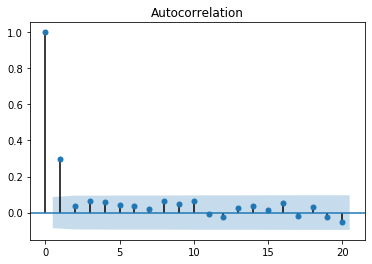

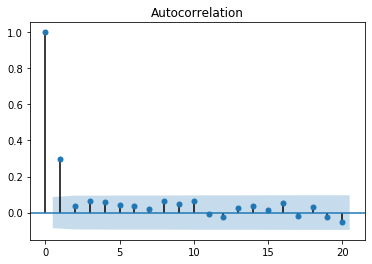

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff,lags=20)

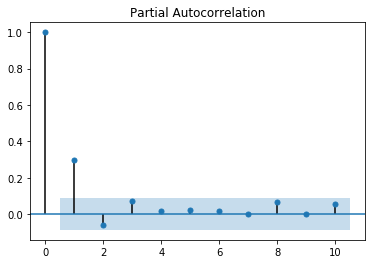

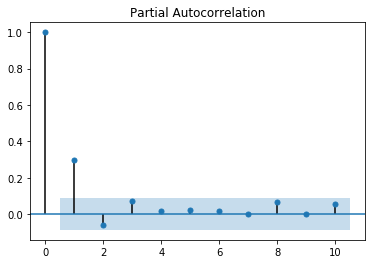

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff,lags=10)

In [81]:
trainSize=int(len(ts_month)*.95)
train_data,test_data=ts_month[0:trainSize],ts_month[trainSize:]

In [82]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data,order=(1,1,1))
result=model.fit()

In [83]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                  488
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1185.852
Method:                       css-mle   S.D. of innovations              0.021
Date:                Fri, 11 Sep 2020   AIC                          -2363.703
Time:                        15:20:25   BIC                          -2346.942
Sample:                    02-28-1975   HQIC                         -2357.119
                         - 09-30-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.223      0.824      -0.002       0.003
ar.L1.D.Value     0.0011      0.154      0.007      0.995      -0.301       0.304
ma.L1.D.Value     0.3283      0.148      2.224      0.026       0.039       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          942.2228           +0.0000j          942.2228            0.0000
MA.1           -3.0463           +0.0000j            3.0463            0.5000
-----------------------------------------------------------------------------
"""

In [84]:
Y_pred=result.forecast(steps=26)[0]

array([0.89116545, 0.89145003, 0.89173542, 0.89202081, 0.89230619,
       0.89259158, 0.89287697, 0.89316236, 0.89344774, 0.89373313,
       0.89401852, 0.89430391, 0.89458929, 0.89487468, 0.89516007,
       0.89544546, 0.89573084, 0.89601623, 0.89630162, 0.89658701,
       0.89687239, 0.89715778, 0.89744317, 0.89772856, 0.89801394,
       0.89829933])

In [85]:
np.sqrt(np.mean((Y_pred-test_data)**2))

0.031092311045547685

In [86]:
np.mean(np.abs(test_data-Y_pred)/test_data)

0.027883740116379292

In [91]:
test_datad=pd.DataFrame(test_data)
test_datad['PValue']=Y_pred
test_datad

,Value,PValue
Date,,
2015-10-31,0.890345,0.891165
2015-11-30,0.932814,0.891450
2015-12-31,0.919019,0.891735
2016-01-31,0.921960,0.892021
2016-02-29,0.901714,0.892306
2016-03-31,0.898929,0.892592
2016-04-30,0.881871,0.892877
2016-05-31,0.884805,0.893162
2016-06-30,0.890268,0.893448


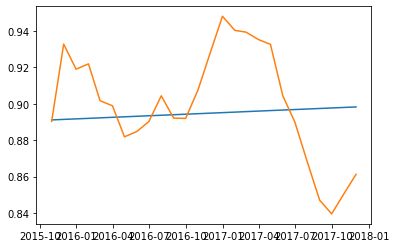

In [92]:
plt.plot(test_datad['PValue'])
plt.plot(test_datad['Value'])

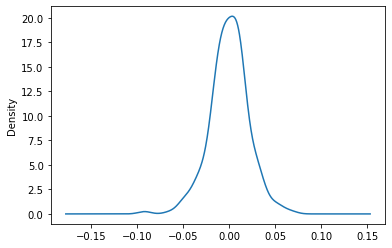

In [93]:
resid=result.resid
resid.plot(kind='kde')
